Populating the interactive namespace from numpy and matplotlib


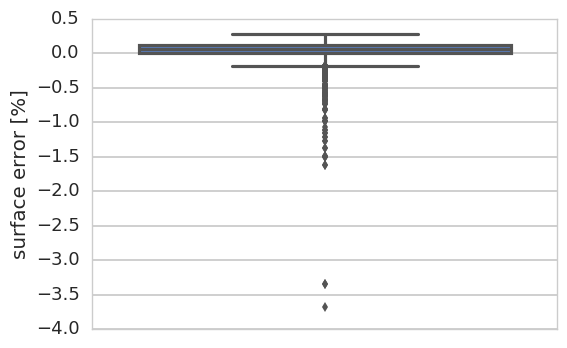

428/1257


In [53]:
%run evaltools.ipynb

In [54]:
datapath
df = read_data(datapath)

 1257 :
volume (w/s): 
WilcoxonResult(statistic=260763.0, pvalue=1.4134594451700781e-25) 
SpearmanrResult(correlation=0.99501031327281397, pvalue=0.0) 
surface (w/s): 
WilcoxonResult(statistic=185780.0, pvalue=1.4053671647966367e-59) 
SpearmanrResult(correlation=0.99726964268878449, pvalue=0.0) 



,surface error [%],volume error [%],measurement_resolution
1539,-0.584944,-1.297250,25
1514,-0.538538,-1.253007,25
1516,0.275362,0.000479,25
1529,0.275387,0.000337,25
1541,0.277026,0.000145,25
1551,-0.584944,-1.297250,25
1553,0.277026,0.000145,25
1563,-0.584944,-1.297250,25
1565,0.277026,0.000145,25
1575,-0.584944,-1.297250,25


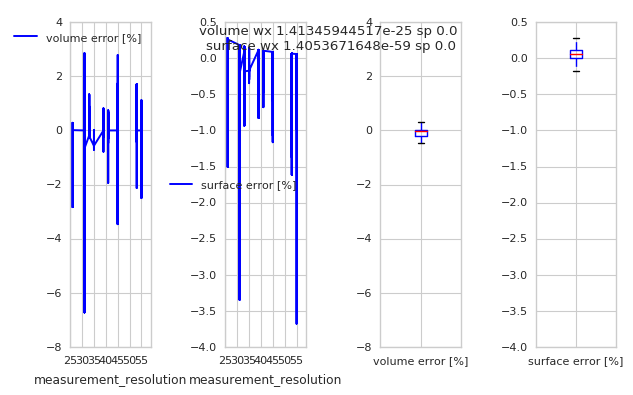

In [55]:
show_error(df)

In [56]:
list_filter(df.keys(), contain="note")

['config output note']

compensation method 5 tubes cylinder surface + sphere error 18 :
volume (w/s): 
WilcoxonResult(statistic=0.0, pvalue=0.00019643672621231134) 
SpearmanrResult(correlation=nan, pvalue=nan) 
surface (w/s): 
WilcoxonResult(statistic=0.0, pvalue=0.00019643672621231134) 
SpearmanrResult(correlation=nan, pvalue=nan) 

compensation method 5 tubes cylinder surface + sphere error + join error 18 :
volume (w/s): 
WilcoxonResult(statistic=0.0, pvalue=0.00019643672621231134) 
SpearmanrResult(correlation=nan, pvalue=nan) 
surface (w/s): 
WilcoxonResult(statistic=0.0, pvalue=0.00019643672621231134) 
SpearmanrResult(correlation=nan, pvalue=nan) 

compensation method 5 tubes cylinder volume + sphere error 18 :
volume (w/s): 
WilcoxonResult(statistic=0.0, pvalue=0.00019643672621231134) 
SpearmanrResult(correlation=nan, pvalue=nan) 
surface (w/s): 
WilcoxonResult(statistic=0.0, pvalue=0.00019643672621231134) 
SpearmanrResult(correlation=nan, pvalue=nan) 

element number cylinder volume + sphere error 23 

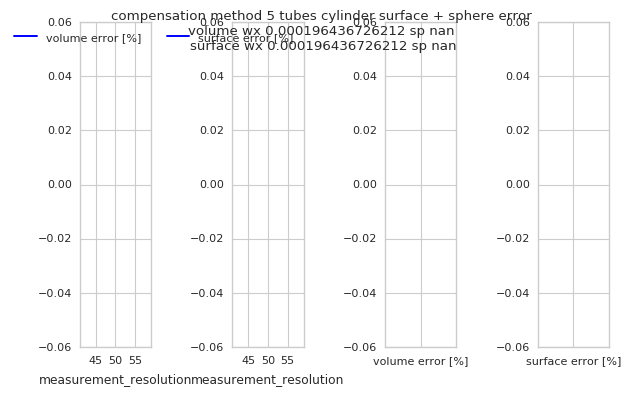

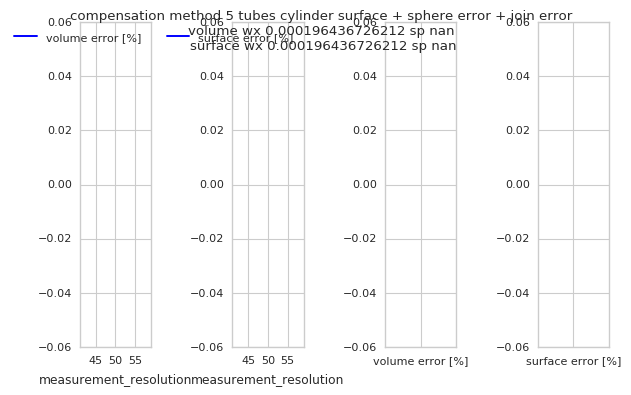

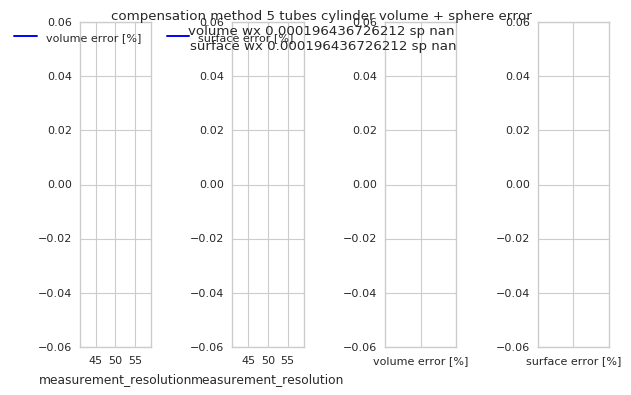

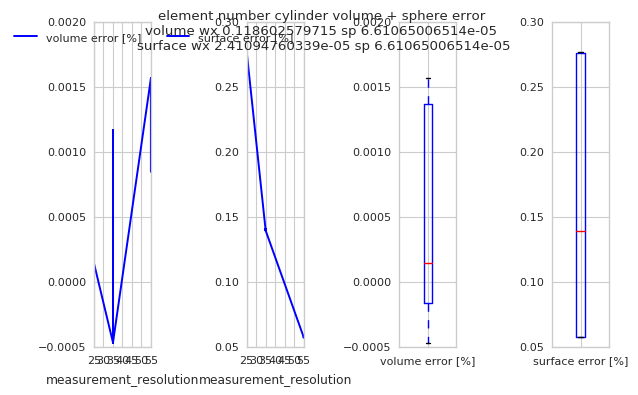

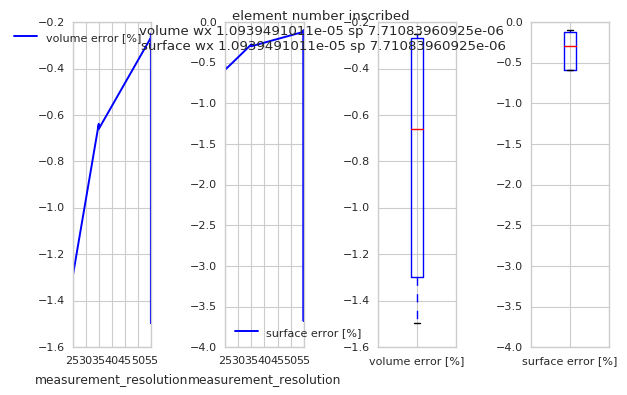

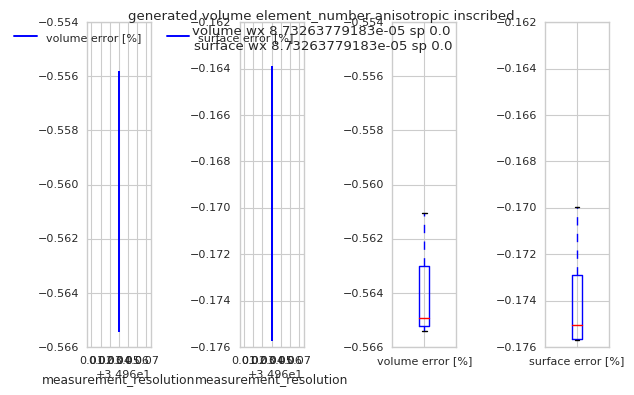

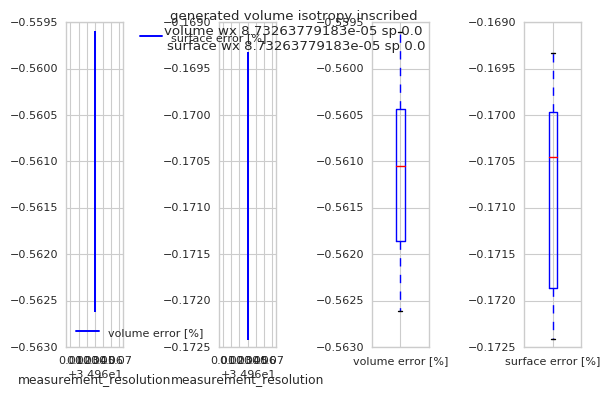

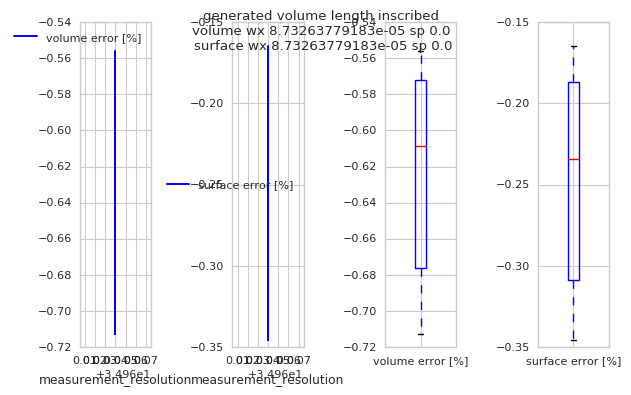

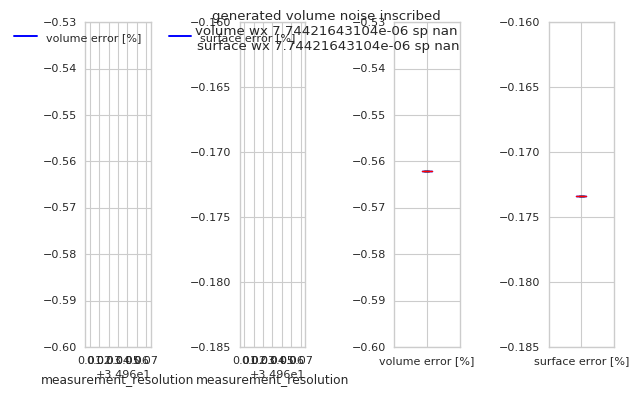

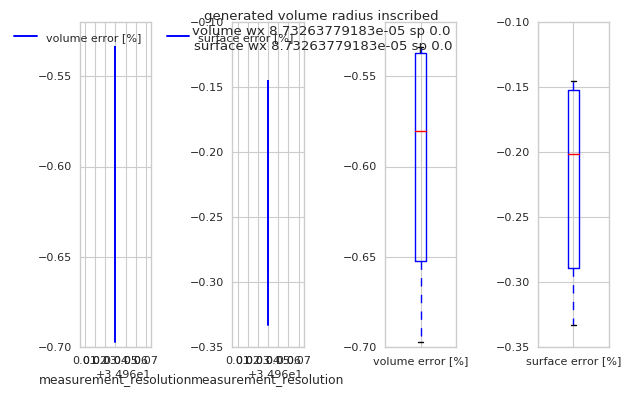

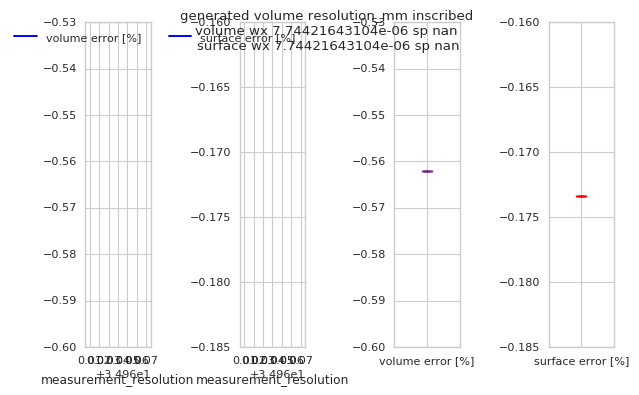

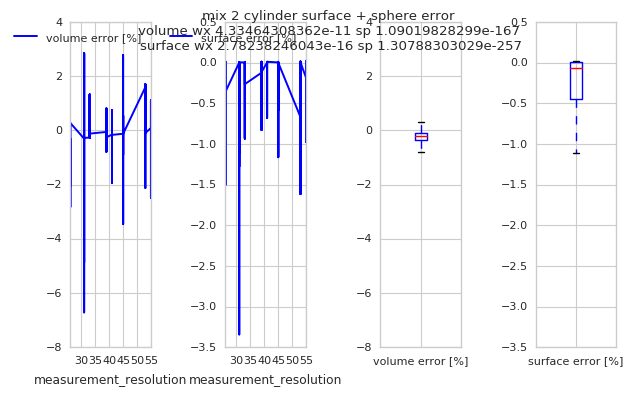

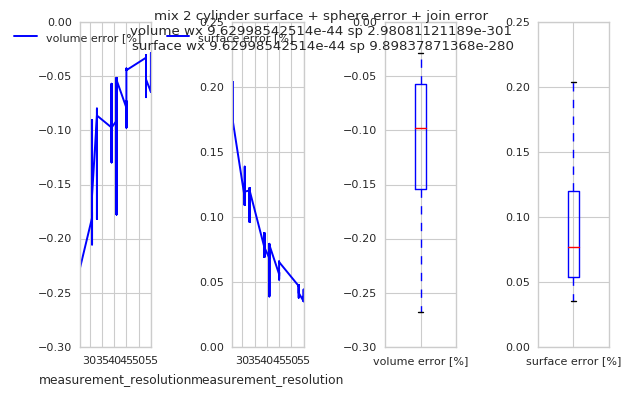

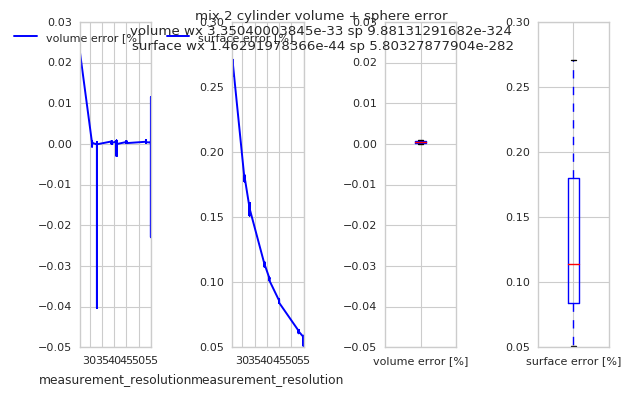

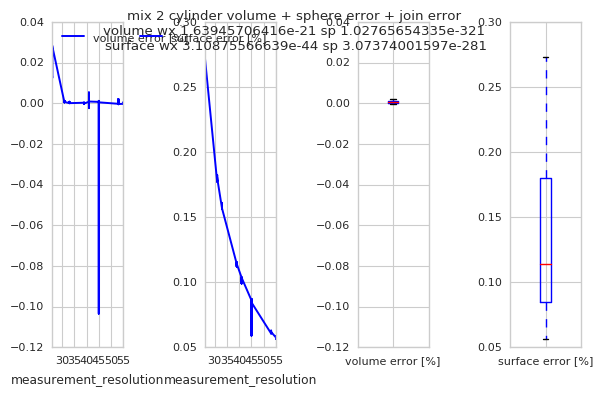

In [57]:
for note in np.unique(df["config output note"]):
    dfs = df[df["config output note"] == note]
    show_error(dfs, radius_method=note)

# Object number

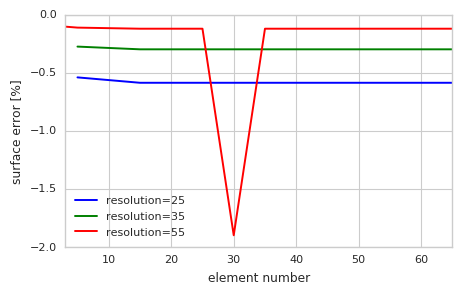

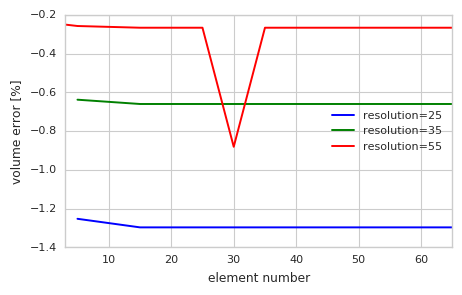

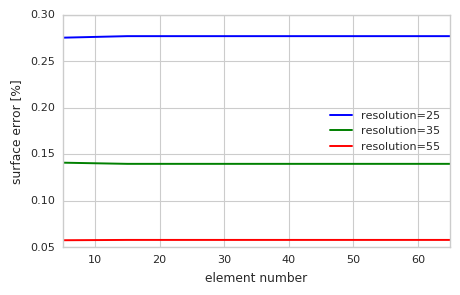

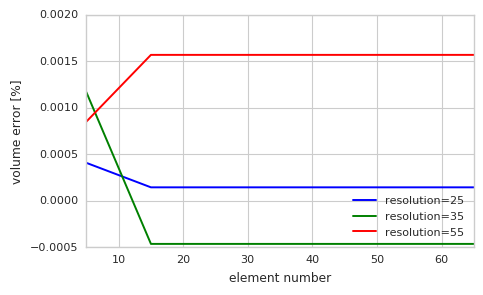

In [58]:

for radius_method in available_radius_methods:
    dfs = df[
        df[note_key] == "element number " + radius_method
        # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
    ]
    if len(dfs) < 1:
        continue

    # surface
    ykey="surface error [mm^2]"
    ykey="surface error [%]"
    dfs_group = dfs[["element number", "measurement_resolution", ykey]].sort_values(by="element number").groupby(by="measurement_resolution")
    # .plot(x="element_number")

    fig, ax = plt.subplots(figsize=(5,3))
    # dfs_group.plot(x="element_number", y="surface error [%]", ax=ax)
    for label, dfi in dfs_group:
        #dfi.plot(x="element number", y=ykey, ax=ax, label="resolution={}".format(label))
        dfi.groupby(by="element number").mean().reset_index().plot(x="element number", y=ykey, ax=ax, label="resolution={}".format(label))
    #    df.vals.plot(x="element_number", ax=ax, label=label)
    #plt.legend()
    plt.ylabel(ykey)
    fn = "element_number_surface_" + radius_method 
    plt.savefig(fn + ".pdf", bbox_inches='tight')
    plt.savefig(fn + ".png", bbox_inches='tight', dpi=600)
    
    # volume
    ykey="volume error [mm^3]"
    ykey="volume error [%]"
    dfs_group = dfs[["element number", "measurement_resolution", ykey]].sort_values(by="element number").groupby(by="measurement_resolution")
    # .plot(x="element_number")

    fig, ax = plt.subplots(figsize=(5,3))
    # dfs_group.plot(x="element_number", y="surface error [%]", ax=ax)
    for label, dfi in dfs_group:
        dfi.groupby(by="element number").mean().reset_index().plot(x="element number", y=ykey, ax=ax, label="resolution={}".format(label))
    #    df.vals.plot(x="element_number", ax=ax, label=label)
    #plt.legend()
    plt.ylabel(ykey)
    fn = "element_number_volume_" + radius_method 
    plt.savefig(fn + ".pdf", bbox_inches='tight')
    plt.savefig(fn + ".png", bbox_inches='tight', dpi=600)

In [59]:
# zip(list(dfs_group))